<a href="https://colab.research.google.com/github/lilyzhizhou/Datathon-4/blob/main/Data_Cleaning_Vitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load in data
# Lily
data_raw = pd.read_csv('/content/drive/MyDrive/Machine Learning /Datathon #4/datathon4.csv')

In [4]:
print(data_raw.shape)
data_raw.head()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

Keep only Vitals Variables for 1st hour of stay

---



In [18]:
columns_to_keep =['hospital_death','icu_admit_source','age', 'gender',
                  'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
                  'h1_heartrate_max',	'h1_heartrate_min',
                  'h1_mbp_noninvasive_max','h1_mbp_noninvasive_min',
                  'h1_resprate_max','h1_resprate_min',
                  'h1_spo2_max', 'h1_spo2_min',
                  'h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min',
                  'h1_temp_max','h1_temp_min',
                  'apache_4a_icu_death_prob', 'apache_2_diagnosis',	'apache_3j_diagnosis'] + [col for col in data_raw.columns if col.startswith('gcs')]

data = data_raw[columns_to_keep]

print(data.shape)
data.head()

(91713, 25)


,hospital_death,icu_admit_source,age,gender,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,apache_4a_icu_death_prob,apache_2_diagnosis,apache_3j_diagnosis,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache
0,0,Floor,68.0,M,68.0,63.0,119.0,108.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,39.5,37.5,0.05,113.0,502.01,3.0,6.0,0.0,4.0
1,0,Floor,77.0,F,61.0,48.0,114.0,100.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,36.3,36.3,0.29,108.0,203.01,1.0,3.0,0.0,1.0
2,0,Accident & Emergency,25.0,F,88.0,58.0,96.0,78.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,36.7,36.7,0.00,122.0,703.03,3.0,6.0,0.0,5.0
3,0,Operating Room / Recovery,81.0,F,NaN,NaN,100.0,96.0,NaN,NaN,12.0,11.0,100.0,99.0,NaN,NaN,35.6,34.8,0.03,203.0,1206.03,4.0,6.0,0.0,5.0
4,0,Accident & Emergency,19.0,M,99.0,68.0,89.0,76.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,NaN,NaN,NaN,119.0,601.01,NaN,NaN,NaN,NaN


In [19]:
# Drop all observations that didn't conduct for gcs
print('before', data['gcs_unable_apache'].value_counts(dropna=False))

data = data[(data['gcs_unable_apache'] != 1) & (data['gcs_unable_apache'].notna())]

print('after', data['gcs_unable_apache'].value_counts(dropna=False))

data = data.drop(['gcs_unable_apache'], axis = 1)

before 0.0    89812
NaN     1037
1.0      864
Name: gcs_unable_apache, dtype: int64
after 0.0    89812
Name: gcs_unable_apache, dtype: int64


In [20]:
# Filter to only have those who were admitted straight from admission
data = data[data['icu_admit_source'] == 'Accident & Emergency']
data['icu_admit_source'].value_counts()

# Drop admit source
data = data.drop('icu_admit_source', axis = 1)

In [21]:
# encoding gender
data['gender'] = data['gender'].map({'F': 1, 'M': 0})

Checking NA

---



In [22]:
missing_count = data.isna().sum()
total_count = len(data)
missing_percentage = (missing_count / total_count) * 100

missing_info = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage.round(0)})
print(missing_info.sort_values(by='Missing Percentage', ascending=False))

                           Missing Count  Missing Percentage
h1_temp_min                        12695                24.0
h1_temp_max                        12695                24.0
apache_4a_icu_death_prob            4287                 8.0
h1_mbp_noninvasive_max              3068                 6.0
h1_mbp_noninvasive_min              3068                 6.0
h1_spo2_max                         2300                 4.0
age                                 2305                 4.0
h1_sysbp_noninvasive_min            2332                 4.0
h1_sysbp_noninvasive_max            2332                 4.0
h1_spo2_min                         2300                 4.0
h1_resprate_max                     2367                 4.0
h1_resprate_min                     2367                 4.0
h1_diasbp_noninvasive_min           2335                 4.0
h1_diasbp_noninvasive_max           2335                 4.0
h1_heartrate_min                    1541                 3.0
h1_heartrate_max        

Data Exploration

---



In [23]:
# create list of variables
high_missing = missing_info[missing_info['Missing Percentage'] >= 20].index.tolist()

target_column = 'hospital_death'
categorical_columns = ['gender']

all_columns = data.columns
numerical_columns = [col for col in all_columns if col != target_column and col not in categorical_columns]

In [24]:
# Convert numeric categorical variables into descriptive categories
data_dscrpt = data.copy()

data_dscrpt['hospital_death'].replace({0.0 : 'No Death', 1.0 : 'Death'}, inplace=True)
data_dscrpt['gender'].replace({0 : 'F', 1 : 'M'}, inplace=True)

data_dscrpt.head()

,hospital_death,age,gender,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,apache_4a_icu_death_prob,apache_2_diagnosis,apache_3j_diagnosis,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache
2,No Death,25.0,M,88.0,58.0,96.0,78.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,36.7,36.7,0.00,122.0,703.03,3.0,6.0,5.0
5,No Death,67.0,F,89.0,89.0,83.0,83.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,36.7,36.7,0.02,301.0,403.01,4.0,6.0,5.0
6,No Death,59.0,M,NaN,NaN,79.0,72.0,117.0,117.0,18.0,18.0,100.0,100.0,NaN,NaN,36.8,35.0,0.05,108.0,203.01,4.0,6.0,5.0
7,No Death,70.0,F,74.0,55.0,118.0,114.0,88.0,60.0,28.0,26.0,96.0,92.0,119.0,106.0,38.5,38.5,0.06,113.0,501.05,4.0,6.0,5.0
9,No Death,50.0,F,83.0,61.0,96.0,60.0,101.0,77.0,29.0,17.0,100.0,96.0,135.0,103.0,36.9,36.9,0.01,112.0,107.01,4.0,6.0,5.0


Distribution of Deaths

In [25]:
# Checking for death imbalance

# Compute the count of each class in the 'target' column
counts = data_dscrpt['hospital_death'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of death',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in death',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

Numerical Variables

In [26]:
len(numerical_columns)

21

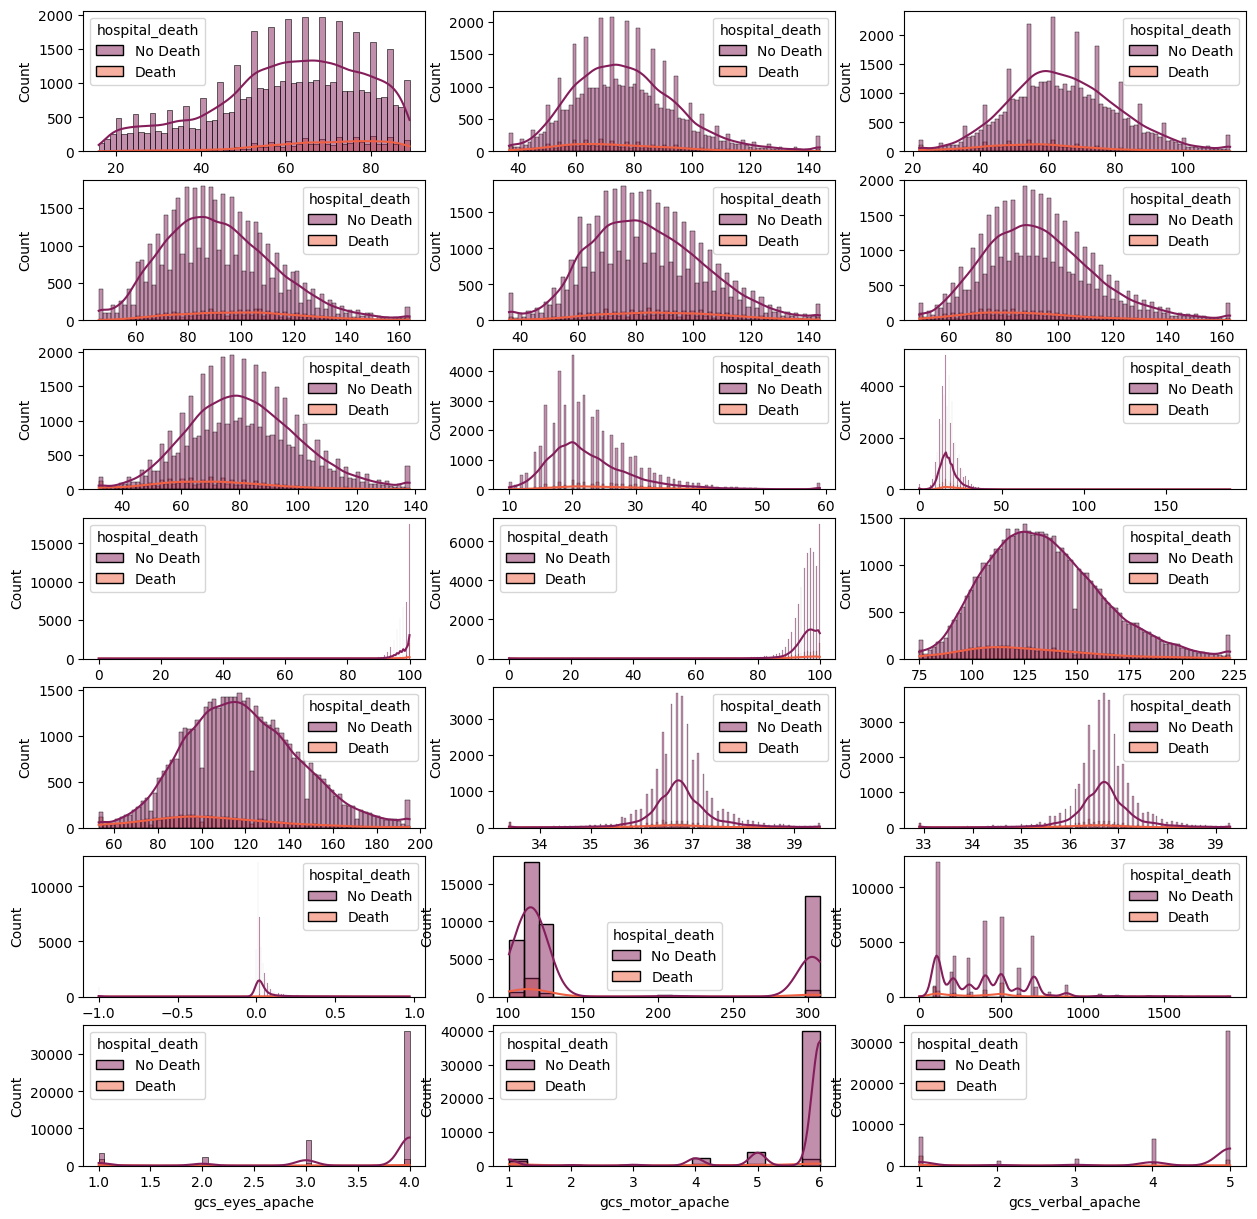

In [28]:
# checking the difference in distribution of numerical features in two classes

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=7, figsize=(15, 15))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data_dscrpt, x=column, hue= target_column, kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

Categorical Variable

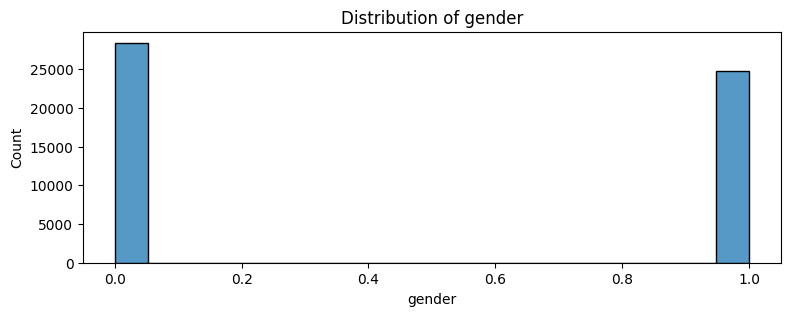

In [29]:
  for column in data[categorical_columns]:
    plt.figure(figsize=(9, 3))
    sns.histplot(data[column], kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

Exploring Missing

---



In [30]:
high_missing

['h1_temp_max', 'h1_temp_min']

In [31]:
# Do the missing observations have higher deaths?

data_na = data[data[high_missing].isna().any(axis=1)]

print(data_na.shape)
data_na.head()

(12695, 23)


,hospital_death,age,gender,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,apache_4a_icu_death_prob,apache_2_diagnosis,apache_3j_diagnosis,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache
35,0,71.0,0.0,78.0,74.0,88.0,82.0,93.0,93.0,30.0,28.0,97.0,97.0,163.0,136.0,NaN,NaN,0.04,301.0,410.01,2.0,5.0,2.0
48,0,55.0,0.0,75.0,67.0,97.0,94.0,92.0,82.0,19.0,18.0,99.0,99.0,121.0,113.0,NaN,NaN,0.02,114.0,102.01,4.0,6.0,5.0
59,0,56.0,1.0,88.0,69.0,76.0,66.0,105.0,105.0,25.0,24.0,98.0,93.0,165.0,142.0,NaN,NaN,0.00,302.0,111.01,4.0,6.0,5.0
64,0,59.0,0.0,78.0,63.0,92.0,84.0,88.0,77.0,23.0,9.0,99.0,98.0,111.0,100.0,NaN,NaN,0.39,114.0,102.01,1.0,1.0,1.0
84,0,67.0,0.0,141.0,103.0,150.0,120.0,163.0,106.0,30.0,16.0,97.0,71.0,75.0,128.0,NaN,NaN,0.21,303.0,208.01,1.0,1.0,1.0


In [32]:
# Checking for death imbalance among NA observations

# Compute the count of each class in the 'target' column
counts = data_na['hospital_death'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of death',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in death',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

- no imbalance, should be good to remove na values given large sample size

In [33]:
# Drop NA values
data = data.dropna()
print(data.shape)

(33254, 23)


In [34]:
# Checking for death imbalance

# Compute the count of each class in the 'target' column
counts = data['hospital_death'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of death',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in death',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

Correlation Matrix

---



<Axes: >

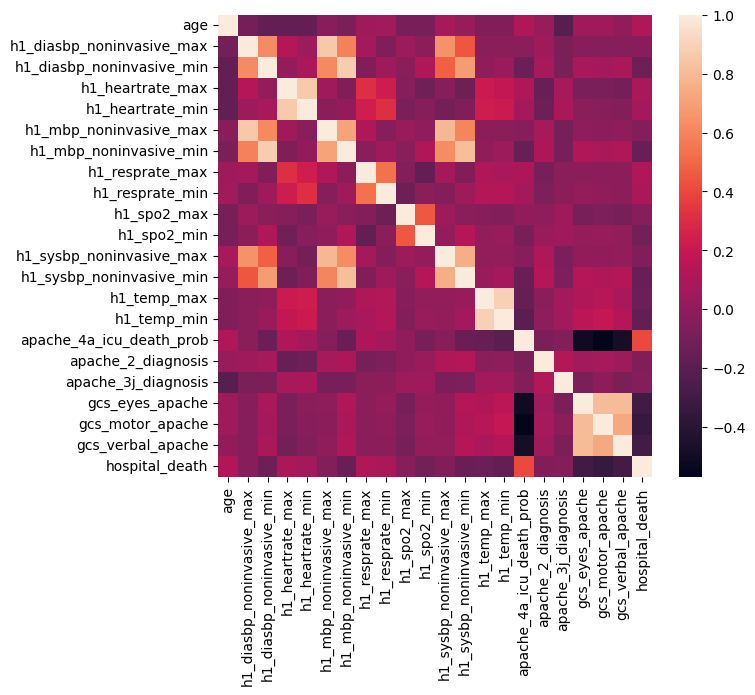

In [35]:
# correlation matrix
columns = numerical_columns + [target_column]

plt.figure(figsize=(7,6))
sns.heatmap(data[columns].corr())

In [36]:
# Export dataset to shared drive
data.to_csv('data_clean.csv')
!cp data_clean.csv "/content/drive/MyDrive/Machine Learning /Datathon #4"